Identifying Extreme Weather Events 

Step 1: Load and Inspect the Dataset

In [4]:
import pandas as pd

# Load the dataset
file_path = "project_1.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display the first few rows
print("\nSample Data:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        27374 non-null  object 
 1   TREFMXAV_U  27374 non-null  float64
 2   FLNS        27374 non-null  float64
 3   FSNS        27374 non-null  float64
 4   PRECT       27374 non-null  float64
 5   PRSN        27374 non-null  float64
 6   QBOT        27374 non-null  float64
 7   TREFHT      27374 non-null  float64
 8   UBOT        27374 non-null  float64
 9   VBOT        27374 non-null  float64
 10  lat         27374 non-null  float64
 11  lon         27374 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB

Sample Data:
                  time  TREFMXAV_U       FLNS       FSNS         PRECT  \
0  2006-01-02 00:00:00   282.77585  41.925180  25.926952  4.663135e-09   
1  2006-01-03 00:00:00   284.47113   8.905806  10.946910  8.046593e-08   
2  2006-01-04 

Step 2: Define Extreme Weather Events

According to the Outcomes document, extreme weather events are identified based on percentile thresholds (e.g., top 5%). We will define:

Heatwaves: Days where temperature is in the top 5% of the dataset.
Heavy Precipitation: Days where precipitation is in the top 5%.
Strong Winds: Days where wind speed is in the top 5%.

Extreme Weather Event Counts:
                     Extreme Event Counts
heatwave                              137
heavy_precipitation                   137
strong_winds                          137


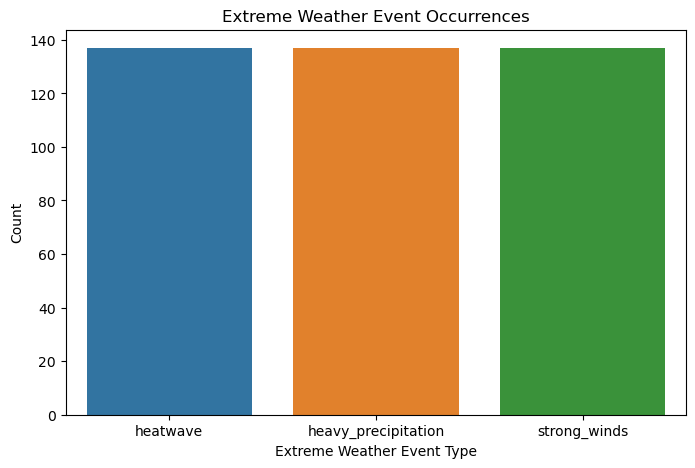

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define column names correctly
temp_col = "TREFMXAV_U"  # Maximum reference temperature
precip_col = "PRECT"  # Total precipitation
wind_u_col = "UBOT"  # Zonal wind component
wind_v_col = "VBOT"  # Meridional wind component

# Compute wind speed magnitude
df["wind_speed"] = np.sqrt(df[wind_u_col]**2 + df[wind_v_col]**2)

# Define 99th percentile thresholds for extreme events
thresholds = {
    "heatwave": df[temp_col].quantile(0.995),
    "heavy_precipitation": df[precip_col].quantile(0.995),
    "strong_winds": df["wind_speed"].quantile(0.995)
}

# Create boolean columns for extreme events
df["heatwave"] = df[temp_col] > thresholds["heatwave"]
df["heavy_precipitation"] = df[precip_col] > thresholds["heavy_precipitation"]
df["strong_winds"] = df["wind_speed"] > thresholds["strong_winds"]

# Count occurrences of extreme events
event_counts = df[["heatwave", "heavy_precipitation", "strong_winds"]].sum()

# Convert event counts to a DataFrame for better display
event_counts_df = event_counts.to_frame(name="Extreme Event Counts")

# Print event counts
print("Extreme Weather Event Counts:")
print(event_counts_df)

# Plot the event counts as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=event_counts.index, y=event_counts.values, hue=event_counts.index, legend=False)
plt.xlabel("Extreme Weather Event Type")
plt.ylabel("Count")
plt.title("Extreme Weather Event Occurrences")
plt.show()


 Step 3: Summarize Frequency, Duration, and Seasonal Trends. This code includes:
Computing summary statistics (mean, min, max, standard deviation)
Visualizing event distributions (histograms and boxplots)
Analyzing seasonal trends (time-series plots)

Summary Statistics of Extreme Weather Events:
       heatwave heavy_precipitation strong_winds
count     27374               27374        27374
unique        2                   2            2
top       False               False        False
freq      27237               27237        27237


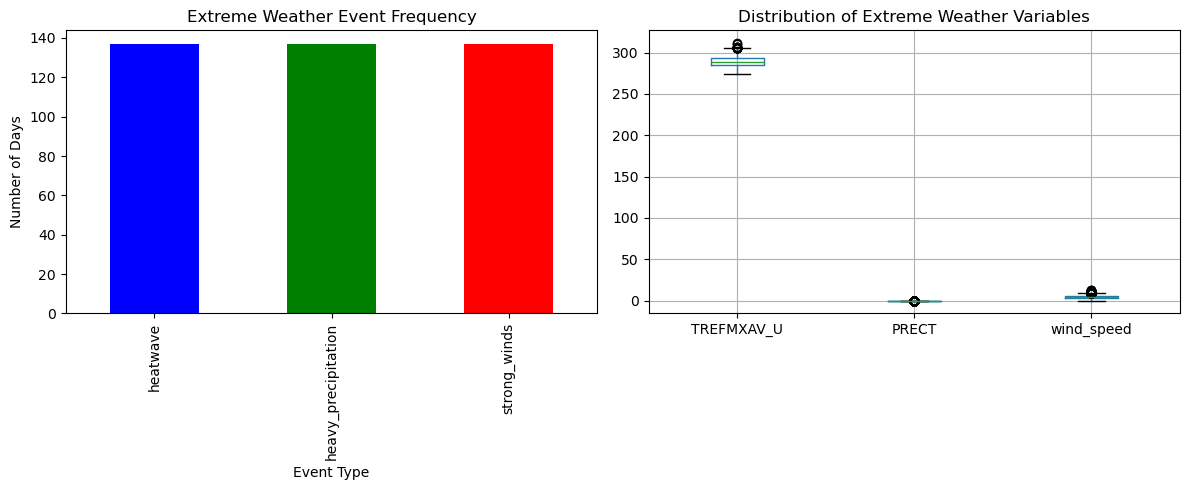

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Compute summary statistics
summary_stats = df[["heatwave", "heavy_precipitation", "strong_winds"]].describe()

# Print summary statistics
print("Summary Statistics of Extreme Weather Events:")
print(summary_stats)

# Visualizing event distributions using histograms and boxplots
plt.figure(figsize=(12, 5))

# Histogram of extreme weather events
plt.subplot(1, 2, 1)
df[["heatwave", "heavy_precipitation", "strong_winds"]].sum().plot(kind="bar", color=['blue', 'green', 'red'])
plt.title("Extreme Weather Event Frequency")
plt.ylabel("Number of Days")
plt.xlabel("Event Type")

# Boxplots for visualizing data distribution
plt.subplot(1, 2, 2)
df[[temp_col, precip_col, "wind_speed"]].boxplot()
plt.title("Distribution of Extreme Weather Variables")

plt.tight_layout()
plt.show()


Step 4: Analyze Seasonal Trends

Seasonal Trends of Extreme Weather Events:
       heatwave  heavy_precipitation  strong_winds
month                                             
1             0                    7            49
2             0                    6            28
3             0                    2            12
4             0                    1             1
5             6                    5             0
6            55                   13             1
7            47                   14             0
8            28                   11             0
9             1                   23             0
10            0                   17             2
11            0                   24            14
12            0                   14            30


<Figure size 1000x600 with 0 Axes>

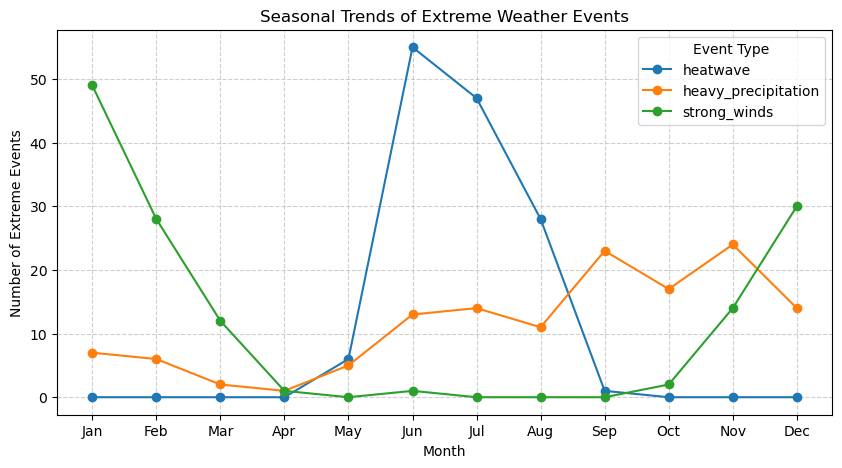

In [41]:
# Convert the 'time' column to datetime format and extract month
df["time"] = pd.to_datetime(df["time"])  
df["month"] = df["time"].dt.month  

# Group extreme weather events by month
seasonal_trends = df.groupby("month")[["heatwave", "heavy_precipitation", "strong_winds"]].sum()

# Display seasonal trends data
print("Seasonal Trends of Extreme Weather Events:")
print(seasonal_trends)

# Plot seasonal trends using a time-series line graph
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind="line", marker="o", linestyle="-", figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Number of Extreme Events")
plt.title("Seasonal Trends of Extreme Weather Events")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])  # Label months
plt.legend(title="Event Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()